In [1]:
import glob, os
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_ROOT_PATH = "../szczury/better_data/"

In [20]:
labels = pd.read_csv('./data/dlaUJ_VPAmodel_koh3_tickling_20190328.txt', delimiter="\t", index_col='Selection')

labels.drop(labels[labels['USV TYPE'] == '22-kHz'].index, inplace=True)
labels.drop(labels[labels['USV TYPE'] == '22-kHz call'].index, inplace=True)

labels.head(10)

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE
Selection,,,,,,,,,,,,
11,Spectrogram 1,1,11.246246,11.258952,0.013,83817.8,85998.1,84472.7,84472.7,ch1-2018-11-20_10-17-43_0000004.wav,2180.3,SH
14,Spectrogram 1,1,13.461827,13.472159,0.010,67102.7,71649.5,69335.9,69335.9,ch1-2018-11-20_10-17-43_0000004.wav,4546.8,SH
18,Spectrogram 1,1,18.289071,18.300751,0.012,89874.0,92781.0,91308.6,91308.6,ch1-2018-11-20_10-17-43_0000004.wav,2907.0,SH
22,Spectrogram 1,1,21.372682,21.384646,0.012,95445.7,99564.0,96679.7,96679.7,ch1-2018-11-20_10-17-43_0000004.wav,4118.3,SH
23,Spectrogram 1,1,21.884120,21.891757,0.008,93507.8,96657.0,95214.8,94726.6,ch1-2018-11-20_10-17-43_0000004.wav,3149.2,SH
24,Spectrogram 1,1,22.433316,22.438707,0.005,72572.8,75970.9,74707.0,74707.0,ch1-2018-11-20_10-17-43_0000004.wav,3398.1,SH
29,Spectrogram 1,1,34.835034,34.868110,0.033,51841.1,56928.3,55664.1,56152.3,ch1-2018-11-20_10-17-43_0000004.wav,5087.2,FM
34,Spectrogram 1,1,38.742444,38.760741,0.018,40213.2,43846.9,42968.8,42968.8,ch1-2018-11-20_10-17-43_0000004.wav,3633.7,FM
39,Spectrogram 1,1,44.550626,44.570330,0.020,49903.1,56443.8,55175.8,55175.8,ch1-2018-11-20_10-17-43_0000004.wav,6540.7,FM


In [19]:

labels['USV TYPE'].unique()


array(['SH', 'FM', 'RP', 'FL', 'ST', 'CMP', 'IU', 'TR', 'RM'],
      dtype=object)

In [21]:
wavs = sorted(glob.glob(f"{DATA_ROOT_PATH}/*.wav"))

for wav in wavs:
    print(wav)

../szczury/better_data/ch1-2018-11-20_10-17-43_0000004.wav
../szczury/better_data/ch1-2018-11-20_10-20-34_0000006.wav
../szczury/better_data/ch1-2018-11-20_10-23-08_0000008.wav
../szczury/better_data/ch1-2018-11-20_10-26-36_0000010.wav
../szczury/better_data/ch1-2018-11-20_10-29-02_0000012.wav
../szczury/better_data/ch1-2018-11-20_10-31-42_0000014.wav
../szczury/better_data/ch1-2018-11-20_10-37-25_0000017.wav
../szczury/better_data/ch1-2018-11-20_10-39-58_0000019.wav
../szczury/better_data/ch1-2018-11-20_10-42-38_0000021.wav


In [4]:
offsets, total_offset = {}, 0.0

for wav in wavs:
    name = os.path.basename(wav)
    duration = librosa.get_duration(filename=wav)
    print(f"{name}: {total_offset:.4f}s")
    offsets[name] = total_offset
    total_offset += duration
    
# print(offsets)

ch1-2018-11-20_10-17-43_0000004.wav: 0.0000s
ch1-2018-11-20_10-20-34_0000006.wav: 120.0049s
ch1-2018-11-20_10-23-08_0000008.wav: 240.0098s
ch1-2018-11-20_10-26-36_0000010.wav: 360.0147s
ch1-2018-11-20_10-29-02_0000012.wav: 480.0196s
ch1-2018-11-20_10-31-42_0000014.wav: 600.0245s
ch1-2018-11-20_10-37-25_0000017.wav: 720.0294s
ch1-2018-11-20_10-39-58_0000019.wav: 840.0343s
ch1-2018-11-20_10-42-38_0000021.wav: 960.0392s


In [23]:
labels['Relative Begin Time (s)'] = labels.apply (
    lambda row: row['Begin Time (s)'] - offsets[row['Begin File']],
    axis=1)

labels['Relative End Time (s)'] = labels.apply (
    lambda row: row['End Time (s)'] - offsets[row['Begin File']],
    axis=1
)

In [24]:
labels.tail(20)

,View,Channel,Begin Time (s),End Time (s),Delta Time (s),Low Freq (Hz),High Freq (Hz),Center Freq (Hz),Peak Freq (Hz),Begin File,Delta Freq (Hz),USV TYPE,Relative Begin Time (s),Relative End Time (s)
Selection,,,,,,,,,,,,,,
2830,Spectrogram 1,1,1051.699003,1051.741232,0.042,37731.0,68275.2,59082.0,59570.3,ch1-2018-11-20_10-42-38_0000021.wav,30544.2,CMP,91.659835,91.702064
2831,Spectrogram 1,1,1055.951419,1055.962201,0.011,57238.2,59804.9,59082.0,59082.0,ch1-2018-11-20_10-42-38_0000021.wav,2566.7,SH,95.912251,95.923033
2832,Spectrogram 1,1,1057.648279,1057.654568,0.006,63141.7,66221.8,64453.1,64453.1,ch1-2018-11-20_10-42-38_0000021.wav,3080.1,SH,97.609111,97.615400
2833,Spectrogram 1,1,1062.507687,1062.513528,0.006,55714.3,58778.2,57617.2,57617.2,ch1-2018-11-20_10-42-38_0000021.wav,3063.9,SH,102.468519,102.474360
2834,Spectrogram 1,1,1063.309436,1063.331899,0.022,38757.7,59034.9,44433.6,44921.9,ch1-2018-11-20_10-42-38_0000021.wav,20277.2,ST,103.270268,103.292731
2835,Spectrogram 1,1,1066.376027,1066.398040,0.022,61088.3,81108.8,63964.8,63964.8,ch1-2018-11-20_10-42-38_0000021.wav,20020.5,ST,106.336859,106.358872
2836,Spectrogram 1,1,1069.344159,1069.353594,0.009,61345.0,71355.2,66406.2,66406.2,ch1-2018-11-20_10-42-38_0000021.wav,10010.2,RP,109.304991,109.314426
2837,Spectrogram 1,1,1069.513074,1069.520712,0.008,60574.9,67248.5,63964.8,64453.1,ch1-2018-11-20_10-42-38_0000021.wav,6673.6,SH,109.473906,109.481544
2838,Spectrogram 1,1,1069.565186,1069.573273,0.008,62371.7,69558.5,67382.8,67871.1,ch1-2018-11-20_10-42-38_0000021.wav,7186.8,RP,109.526018,109.534105


## Show single annotation ##

In [96]:
%matplotlib inline
# https://towardsdatascience.com/audio-classification-using-fastai-and-on-the-fly-frequency-transforms-4dbe1b540f89

cache = {}

def show_single_marker(row, n_fft=512, hop_length=128, ax=None, verbose=False):
    if verbose:
        print(row)
    path = f"{DATA_ROOT_PATH}/{row['Begin File']}"
    
    if path not in cache:
        cache[path] = librosa.load(path, sr=None)
        
    y, sr = cache[path]
    assert sr == 250000
    
    start_frame = int(row['Relative Begin Time (s)'] * sr)
    end_frame = int(row['Relative End Time (s)'] * sr)
    
    stft = librosa.stft(y[start_frame: end_frame], n_fft=n_fft, hop_length=hop_length)

    D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

    librosa.display.specshow(D, y_axis=None, x_axis=None, sr=sr, hop_length=hop_length, ax=ax)

## Display sample markers for each 'USV TYPE' ##

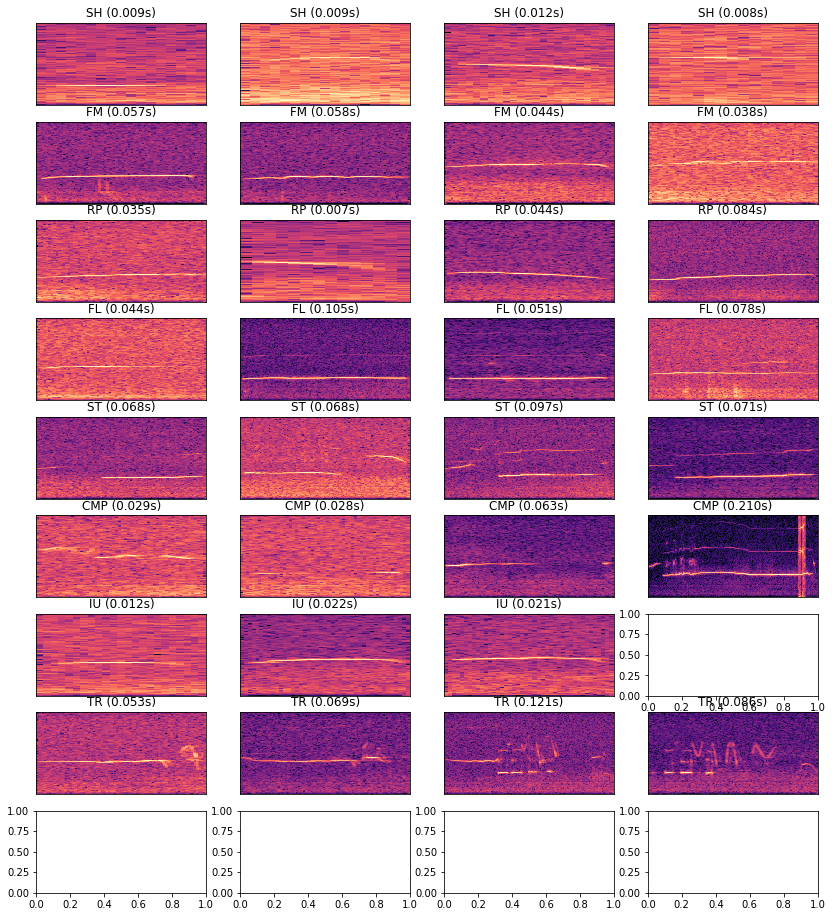

In [116]:
n = 4
USV_TYPES = ['SH', 'FM', 'RP', 'FL', 'ST', 'CMP', 'IU', 'TR', 'RM']

fig, axes = plt.subplots(len(USV_TYPES), n, figsize=(14, 16))

for j, usv_type in enumerate(USV_TYPES):
    rows = labels[
        (labels['Begin File'] == 'ch1-2018-11-20_10-29-02_0000012.wav') & 
        (labels['USV TYPE'] == usv_type)]

    for i, (idx, row) in enumerate(rows.iterrows()):
        if i == 4: break
        show_single_marker(row, ax=axes[j, i])
        axes[j, i].set_title(f"{usv_type} ({row['Delta Time (s)']:.3f}s)")
        
# plt.colorbar(format='%+2.0f dB',)


# Work in progress #

In [8]:
assert False

AssertionError: 

In [ ]:

y, sr = librosa.load(wavs[0], sr=None)

In [ ]:
print('sampling rate:', sr)
print(y.shape)

In [ ]:
%matplotlib inline 

#y.shape, sr
# 22050*120
stft = librosa.stft(y[:1000000], n_fft=512, hop_length=256)
print(stft.shape)
# x_labels = 
# print(stft[:,1000])

# plt.figure(figsize=(12,8))
# sns.lineplot(range(257), np.abs(stft[:,1000]))

In [ ]:
%matplotlib inline

D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
print(D.shape)
plt.figure(figsize=(12,8))
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, hop_length=256)
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

In [ ]:
import matplotlib.pyplot as plt

plt.specgram(y,Fs=sr)